# Sentiment Analysis

## Import & Setup

In [1]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns
import os
from src.progress_bar import printProgressBar
from ast import literal_eval

for dirname, _, filenames in os.walk('../../data/lyrics'):
    for filename in filenames:
        print(os.path.join(dirname, filename).replace("\\", "/"))

print(50 * '-')

for dirname, _, filenames in os.walk('../../data/billboard'):
    for filename in filenames:
        print(os.path.join(dirname, filename).replace("\\", "/"))


../../data/lyrics/artist_song_lyrics.csv
../../data/lyrics/artist_song_lyrics_new.csv
../../data/lyrics/bb-t100-lyrics.csv
../../data/lyrics/bb_t100_lyrics_en.csv
../../data/lyrics/bb_t100_lyrics_en_v2.csv
../../data/lyrics/corona-lyrics.csv
../../data/lyrics/covid_lyrics_bb.csv
../../data/lyrics/lyrics_invalid.json
../../data/lyrics/lyrics_invalid_updated.csv
../../data/lyrics/backups/artist_song_lyrics_bak.csv
../../data/lyrics/backups/bb-t100-lyrics.csv
../../data/lyrics/backups/bb-t100-lyrics_new.csv
../../data/lyrics/backups/bb-t100-lyrics_old.csv
../../data/lyrics/backups/bb_t100_lyrics_en.csv
../../data/lyrics/backups/bb_t100_lyrics_en_v1.csv
../../data/lyrics/backups/bb_t100_lyrics_en_v2.csv
../../data/lyrics/backups/bb_t100_lyrics_en_v3.csv
../../data/lyrics/backups/corona-lyrics.csv
../../data/lyrics/backups/lyrics_invalid_updated.csv
--------------------------------------------------
../../data/billboard/bb_t100_en.csv
../../data/billboard/billboard.csv
../../data/billboard/

### Pandas Display Settings

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 30)

## Loading Data

### Lyrics

In [3]:
lyrics = pd.read_csv('../../data/lyrics/bb_t100_lyrics_en.csv', index_col=0, encoding='utf-8')
lyrics['first_appearance'] = pd.to_datetime(lyrics['first_appearance'], format='%Y-%m-%d')
lyrics['release_date'] = pd.to_datetime(lyrics['release_date'], format='%Y-%m-%d')
lyrics['genius_annotations'] = lyrics['genius_annotations'].apply(literal_eval)
lyrics['genius_comments'] = lyrics['genius_comments'].apply(literal_eval)
lyrics.head()

,billboard_id,lyrics_id,artist,first_artist,song,weeks_on_chart,peak_rank,genius_id,lyrics,url,...,word_count,language,language_score,first_appearance,genius_primary_artist,genius_description,genius_annotations,genius_comments,release_date,annotation_ids
0,0,0,Ariana Grande,Ariana Grande,"Thank U, Next",28.0,1.0,4063065,Thought I'd end up with Se...,https://genius.com/Ariana-...,...,460,en,0.999997,2019-01-05,Ariana Grande,On the lead single and tit...,[(One taught me love\n One...,[The Mac shoutout has me f...,2018-11-03,"['15720075', '15720076', '..."
1,1,1,Halsey,Halsey,Without Me,52.0,1.0,3977187,Found you when your heart ...,https://genius.com/Halsey-...,...,435,en,0.999995,2019-01-05,Halsey,“Without Me” is the first ...,[(Gave love ’bout a hundre...,[The queen is ready to sna...,2018-10-04,"['15517989', '15520369', '..."
2,2,2,Mariah Carey,Mariah Carey,All I Want For Christmas I...,43.0,1.0,204233,I don't want a lot for Chr...,https://genius.com/Mariah-...,...,388,en,0.999996,2019-01-05,Mariah Carey,“All I Want For Christmas ...,[(I don’t need to hang my ...,"[i really like this song, ...",1994-11-01,"['8393500', '8393500', '21..."
3,3,3,Travis Scott,Travis Scott,Sicko Mode,52.0,1.0,3876994,"Astro, yeah\nSun is down, ...",https://genius.com/Travis-...,...,771,en,0.999998,2019-01-05,Travis Scott,“SICKO MODE” refers to Tra...,[(She’s in love with who I...,[HAD ME OUT LIKE A LIGHT (...,2018-08-03,"['15114078', '17948214', '..."
4,4,4,Post Malone & Swae Lee,Post Malone,Sunflower (Spider-Man: Int...,53.0,1.0,3993850,"Ayy, ayy, ayy, ayy (Ooh)\n...",https://genius.com/Post-ma...,...,305,en,0.999997,2019-01-05,Post Malone & Swae Lee,“Sunflower” marks the seco...,[(Then you’re left in the ...,[Me enjoying “Sunflower” a...,2018-10-18,"['16057378', '16057378']"


### Lyrics Adressing COVID-19
This is the resulting data set of the keyword analysis.

In [4]:
covid_lyrics = pd.read_csv('../../data/lyrics/covid_lyrics_bb.csv', index_col=0, encoding='utf-8')
covid_lyrics['first_appearance'] = pd.to_datetime(lyrics['first_appearance'], format='%Y-%m-%d')
covid_lyrics['release_date'] = pd.to_datetime(covid_lyrics['release_date'], format='%Y-%m-%d')
covid_lyrics['genius_annotations'] = covid_lyrics['genius_annotations'].apply(literal_eval)
covid_lyrics['genius_comments'] = covid_lyrics['genius_comments'].apply(literal_eval)
covid_lyrics['keywords'] = covid_lyrics['keywords'].apply(literal_eval)
covid_lyrics['desc_keywords'] = covid_lyrics['desc_keywords'].apply(literal_eval)
covid_lyrics['ann_keywords'] = covid_lyrics['ann_keywords'].apply(literal_eval)
covid_lyrics['com_keywords'] = covid_lyrics['com_keywords'].apply(literal_eval)
covid_lyrics.head()

,billboard_id,lyrics_id,artist,first_artist,song,weeks_on_chart,peak_rank,genius_id,lyrics,url,...,com_keywords,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,has_covid_keyword,desc_has_covid_keyword,ann_has_covid_keyword,com_has_covid_keyword
850,6822,850,twenty one pilots,twenty one pilots,Level Of Concern,11.0,23.0,5428841,"Need you, tell me\nNeed yo...",https://genius.com/Twenty-...,...,"{'quarantine': 2, 'm': 2, ...",tell,need,okay,alright,level,True,True,True,True
862,6916,862,DaBaby Featuring YoungBoy ...,DaBaby,Jump,4.0,17.0,5465136,"(Cha-ching)\nOkay, let's g...",https://genius.com/Dababy-...,...,"{'song': 7, 'good': 3, 'al...",bitch,nigga,let,ass,baby,False,True,False,False
867,6952,867,DaBaby Featuring Future & ...,DaBaby,LIGHTSKIN SHIT,1.0,53.0,5465365,"Uh, uh, uh-huh\nYeah (Oh L...",https://genius.com/Dababy-...,...,"{'future': 3, 'baby': 2, '...",bitch,fuck,shit,sick,pop,False,False,True,False
870,6963,870,DaBaby,DaBaby,BLAME IT ON BABY,1.0,64.0,5462131,"I'm like fuck it, let the ...",https://genius.com/Dababy-...,...,"{'baby': 4, 'song': 2, 'ja...",nigga,let,know,baby,bitch,False,False,True,False
903,7150,903,Drake,Drake,Losses,1.0,51.0,5520818,"Hey, Instagram\nThis song ...",https://genius.com/Drake-l...,...,"{'drake': 6, 'bar': 3, 'so...",know,game,nigga,hold,day,False,True,True,False


### Billboard Top 100 Chart

In [5]:
bb_t100 = pd.read_csv('../../data/billboard/bb_t100_en.csv', index_col=0)
bb_t100['date'] = pd.to_datetime(bb_t100['date'], format='%Y-%m-%d')
bb_t100.head()

,billboard_id,lyrics_id,song,artist,peak_rank,rank_last_week,weeks_on_chart,rank,date,first_appearance,language,language_score
0,0,0,"Thank U, Next",Ariana Grande,1,1,8,1,2019-01-05,2019-01-05,en,0.999997
1,1,1,Without Me,Halsey,2,2,12,2,2019-01-05,2019-01-05,en,0.999995
2,2,2,All I Want For Christmas I...,Mariah Carey,3,7,30,3,2019-01-05,2019-01-05,en,0.999996
3,3,3,Sicko Mode,Travis Scott,1,3,21,4,2019-01-05,2019-01-05,en,0.999998
4,4,4,Sunflower (Spider-Man: Int...,Post Malone & Swae Lee,4,4,10,5,2019-01-05,2019-01-05,en,0.999997


### COVID-19 Data

In [6]:
covid = pd.read_csv('../../data/input/owid-covid-data.csv')
covid['date'] = pd.to_datetime(covid['date'], format='%Y-%m-%d')
covid_usa = covid[['iso_code', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'population', 'population_density', 'hospital_beds_per_thousand']].loc[covid['iso_code'] == 'USA']
covid_usa = covid_usa.loc[covid_usa['date'] < '2021-01-01']
covid_usa.head()

,iso_code,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,population,population_density,hospital_beds_per_thousand
120234,USA,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,332915074.0,35.608,2.77
120235,USA,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,332915074.0,35.608,2.77
120236,USA,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,332915074.0,35.608,2.77
120237,USA,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,332915074.0,35.608,2.77
120238,USA,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,332915074.0,35.608,2.77


## Calculate Sentiment

### SpaCy and TextBlob Import

In [7]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load("en_core_web_lg")
nlp.add_pipe('spacytextblob')

### Document-level Sentiment Analyis

In [8]:
def get_sentiment(text, nlp):
    doc = nlp(text)
    return doc._.polarity, doc._.subjectivity, doc._.assessments


### Sentence-level Sentiment Analysis
I defined sentences as single lines and therefore determined them by looking for line breaks (\n). Empty lines and sentences with no sentiment are skipped. The average polarity and subjectivity gets calculated.

In [9]:
def get_sentiment_v2(text, nlp):
    pol_sum = 0
    subj_sum = 0
    count = 0
    for sentence in text.split('\n'):
        if len(sentence) == 0:
            continue
        doc = nlp(sentence)
        if not doc._.assessments:
            continue
        pol_sum += doc._.polarity
        subj_sum += doc._.subjectivity
        count += 1
    if count > 0:
        pol = pol_sum / count
        subj = subj_sum / count
    else:
        pol = 0
        subj = 0
    return pol, subj

Both functions are applied on the lyrics and the results are cached.

In [10]:
try:
    polarity = pd.read_csv('../../data/cache/sentiment_polarity.csv', index_col=0)
    subjectivity = pd.read_csv('../../data/cache/sentiment_subjectivity.csv', index_col=0)
except FileNotFoundError:
    lyrics_series = lyrics['lyrics']
    polarity = []
    subjectivity = []
    i = 0
    l = len(lyrics_series)
    printProgressBar(0, l, prefix='Progress:', suffix='Complete', length=50)
    for i in range(0, l):
        polarity.append(get_sentiment(lyrics_series.iloc[i], nlp)[0])
        subjectivity.append(get_sentiment(lyrics_series.iloc[i], nlp)[1])
        printProgressBar(i + 1, l, prefix='Progress:', suffix='Complete', length=50)

lyrics['sentiment_polarity'] = polarity
lyrics['sentiment_polarity'].to_csv('../../data/cache/sentiment_polarity.csv')
lyrics['sentiment_subjectivity'] = subjectivity
lyrics['sentiment_subjectivity'].to_csv('../../data/cache/sentiment_subjectivity.csv')


In [11]:
try:
    polarity_v2 = pd.read_csv('../../data/cache/sentiment_polarity_v2.csv', index_col=0)
    subjectivity_v2 = pd.read_csv('../../data/cache/sentiment_subjectivity_v2.csv', index_col=0)
except FileNotFoundError:
    lyrics_series = lyrics['lyrics']
    polarity_v2 = []
    subjectivity_v2 = []
    i = 0
    l = len(lyrics_series)
    printProgressBar(0, l, prefix='Progress:', suffix='Complete', length=50)
    for i in range(0, l):
        polarity_v2.append(get_sentiment_v2(lyrics_series.iloc[i], nlp)[0])
        subjectivity_v2.append(get_sentiment_v2(lyrics_series.iloc[i], nlp)[1])
        printProgressBar(i + 1, l, prefix='Progress:', suffix='Complete', length=50)

lyrics['sentiment_polarity_v2'] = polarity_v2
lyrics['sentiment_polarity_v2'].to_csv('../../data/cache/sentiment_polarity_v2.csv')
lyrics['sentiment_subjectivity_v2'] = subjectivity_v2
lyrics['sentiment_subjectivity_v2'].to_csv('../../data/cache/sentiment_subjectivity_v2.csv')


### Filter and Export Results

In [12]:
lyrics.to_excel('../../data/output/bb_t100_lyrics_en.xlsx')


sentiment data for all Songs

In [13]:
sentiment = lyrics[
    ['billboard_id', 'lyrics_id', 'artist', 'song', 'genius_id', 'lyrics', 'url', 'first_appearance', 'release_date',
     'sentiment_polarity', 'sentiment_subjectivity', 'sentiment_polarity_v2', 'sentiment_subjectivity_v2']]
sentiment.to_csv('../../data/sentiment/sentiment.csv')


sentiment data for each week of the charts

In [14]:
merge_cols = ['genius_id', 'lyrics', 'release_date', 'sentiment_polarity', 'sentiment_subjectivity', 'sentiment_polarity_v2', 'sentiment_subjectivity_v2', 'url', 'lyrics_id']
bb_t100_sentiment = bb_t100.merge(sentiment[merge_cols], how='left', left_on='lyrics_id', right_on='lyrics_id',
                                  copy=False)
bb_t100_sentiment = bb_t100_sentiment[
    ['billboard_id', 'lyrics_id', 'song', 'artist', 'lyrics', 'rank', 'peak_rank', 'rank_last_week', 'weeks_on_chart',
     'date', 'release_date', 'sentiment_polarity', 'sentiment_subjectivity', 'sentiment_polarity_v2', 'sentiment_subjectivity_v2', 'genius_id', 'url']]
bb_t100_sentiment.to_csv('../../data/sentiment/bb_t100_sentiment.csv')
bb_t100_sentiment.to_excel('../../data/sentiment/bb_t100_sentiment.xlsx')

sentiment data for covid-19-specific songs

In [15]:
merge_cols = ['sentiment_polarity', 'sentiment_subjectivity', 'sentiment_polarity_v2', 'sentiment_subjectivity_v2', 'lyrics_id']
covid_sentiment = covid_lyrics.merge(sentiment[merge_cols], how='left', left_on='lyrics_id', right_on='lyrics_id',
                                     copy=False)
covid_sentiment = covid_sentiment[
    ['billboard_id', 'lyrics_id', 'artist', 'song', 'genius_id', 'lyrics', 'url', 'first_appearance', 'release_date',
     'sentiment_polarity', 'sentiment_subjectivity', 'sentiment_polarity_v2', 'sentiment_subjectivity_v2']]

covid_sentiment.to_csv('../../data/sentiment/covid_sentiment.csv')
covid_sentiment.to_excel('../../data/sentiment/covid_sentiment.xlsx')

comparison of both calculations

In [16]:
sentiment['sentiment_polarity'].describe()

count    1255.000000
mean        0.057289
std         0.153661
min        -0.500000
25%        -0.041706
50%         0.035980
75%         0.148791
max         0.670270
Name: sentiment_polarity, dtype: float64

In [17]:
sentiment['sentiment_polarity_v2'].describe()

count    1255.000000
mean        0.059848
std         0.154856
min        -0.500000
25%        -0.039124
50%         0.041736
75%         0.154426
max         0.606667
Name: sentiment_polarity_v2, dtype: float64

As both calculations yielded similar results, I decided to use the document-level score for future analysis.


## Visualization

### Polarity Trend in Billboard Top 100 Charts in Comparison to Reported COVID-19Deaths in the USA

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


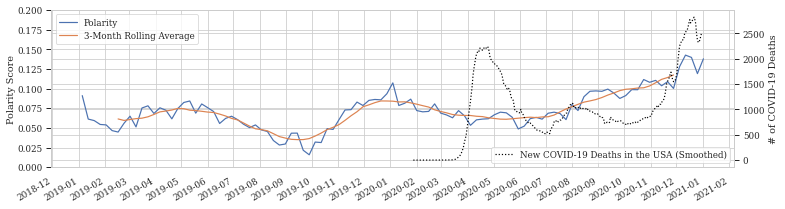

In [18]:
sent_lineplot_dt = bb_t100_sentiment.groupby('date')['sentiment_polarity'].mean().to_frame()
sent_lineplot_dt['rolling_avg'] = sent_lineplot_dt['sentiment_polarity'].rolling(12).mean().shift(-5)

sns.set_theme(context='paper', font='serif', style='whitegrid')
sns.set_style({'axes.grid' : False})

fig = plt.figure(figsize=(11, 3))
ax1a = fig.subplots()  # ax1a for the histogram grid
ax2a = ax1a.twinx()         # ax2a for the cumulative step grid
ax1b = ax1a.twinx()         # ax1b for the histogram plot
ax2b = ax1a.twinx()         # ax2a for the cumulative step plot
# Link the respective y-axes for grid and plot
ax1a.get_shared_y_axes().join(ax1a, ax1b)
ax2a.get_shared_y_axes().join(ax2a, ax2b)
# Remove ticks and labels and set which side to label
ax1a.tick_params(axis="y", labelleft=False, labelright=False, left=False, right=False)
ax2a.tick_params(axis="y", labelleft=False, labelright=False, left=False, right=False)
ax1b.tick_params(axis="y", labelleft=True, labelright=False, left=True, right=False)
ax2b.tick_params(axis="y", labelleft=False, labelright=True, left=False, right=True)
# Spines off
for ax in [ax1a, ax2a, ax1b]:
    for k,v in ax.spines.items():
        v.set_visible(False)

sns.lineplot(data=covid_usa, x='date', y='new_deaths_smoothed', ax=ax2b, color='black', linestyle='dotted', label='New COVID-19 Deaths in the USA (Smoothed)')
sns.lineplot(data=sent_lineplot_dt, x='date', y='sentiment_polarity' ,label='Polarity', ax=ax1b)
sns.lineplot(data=sent_lineplot_dt, x='date', y='rolling_avg', label='3-Month Rolling Average', ax=ax1b)

ax1a.grid()
ax2a.grid()

loc = matplotlib.dates.MonthLocator(interval=1)
ax1a.xaxis.set_major_locator(loc)
ax1a.xaxis.set_major_formatter(matplotlib.dates.AutoDateFormatter(loc))
plt.gcf().autofmt_xdate()

ax1b.set_ylabel(ylabel=None)
ax2b.set_ylabel(ylabel=None)
ax2a.set_ylabel(ylabel='# of COVID-19 Deaths', labelpad=35)
ax1a.set_ylabel(ylabel='Polarity Score', labelpad=35)

ax1a.set_ylim(0, 0.2)
ax1b.set_ylim(0, 0.2)
plt.xticks(rotation=45, ha='right')

plt.margins(x=0.01,tight=True)
ax1b.legend(loc='upper left')
ax2b.legend(loc='lower right')

plt.tight_layout()
plt.savefig('../../data/output/figures/bb_t100_sentiment.eps')
plt.show()
plt.close()


In [19]:
sent_lineplot_dt

,sentiment_polarity,rolling_avg
date,,
2019-01-05,0.091157,NaN
2019-01-12,0.061303,NaN
2019-01-19,0.059379,NaN
2019-01-26,0.054468,NaN
2019-02-02,0.053882,NaN
2019-02-09,0.046636,NaN
2019-02-16,0.044796,0.061460
2019-02-23,0.056031,0.059567
2019-03-02,0.064982,0.060760


### Comparison of Songs Released after the Outbreak to Songs that Charted after the Outbreak

In [20]:
covid_ids = covid_sentiment['lyrics_id'].to_list()



In [21]:
release_outbreak = sentiment.loc[sentiment['release_date'] >= '2020-03-01']
release_outbreak_non_cov = pd.concat([release_outbreak, covid_sentiment]).drop_duplicates(keep=False)
chart_outbreak = sentiment.loc[sentiment['first_appearance'] >= '2020-03-01']
chart_outbreak_non_cov = pd.concat([chart_outbreak, covid_sentiment]).drop_duplicates(keep=False)
all_non_cov = pd.concat([sentiment, covid_sentiment]).drop_duplicates(keep=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


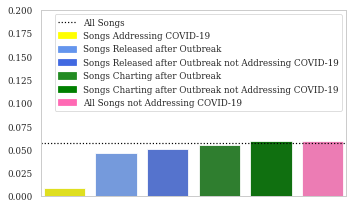

In [22]:
import matplotlib.patches as mpatches

sent_barplot_dt = pd.DataFrame(
    {
        'covid_sentiment' : [covid_sentiment['sentiment_polarity'].mean()],
        'release_outbreak' : [release_outbreak['sentiment_polarity'].mean()],
        'release_outbreak_non_cov' : [release_outbreak_non_cov['sentiment_polarity'].mean()],
        'chart_outbreak' : [chart_outbreak['sentiment_polarity'].mean()],
        'chart_outbreak_non_cov' : [chart_outbreak_non_cov['sentiment_polarity'].mean()],
        'all_non_cov' : [all_non_cov['sentiment_polarity'].mean()]
    }
)

col = ['yellow', 'cornflowerblue', 'royalblue', 'forestgreen', 'green', 'hotpink']

plt.figure(figsize=(5, 3))
sns.barplot(data=sent_barplot_dt, palette=col)


plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

line = plt.axhline(sentiment['sentiment_polarity'].mean(), linestyle='dotted', color='black', label='All Songs')
covid_sentiment_patch = mpatches.Patch(color='yellow', label='Songs Addressing COVID-19')
release_outbreak_patch = mpatches.Patch(color='cornflowerblue', label='Songs Released after Outbreak')
release_outbreak_non_cov_patch = mpatches.Patch(color='royalblue', label='Songs Released after Outbreak not Addressing COVID-19')
chart_outbreak_patch = mpatches.Patch(color='forestgreen', label='Songs Charting after Outbreak')
chart_outbreak_non_cov_patch = mpatches.Patch(color='green', label='Songs Charting after Outbreak not Addressing COVID-19')
all_non_cov_patch = mpatches.Patch(color='hotpink', label='All Songs not Addressing COVID-19')


plt.ylim(0, 0.2)
plt.legend(handles=[line, covid_sentiment_patch, release_outbreak_patch, release_outbreak_non_cov_patch, chart_outbreak_patch, chart_outbreak_non_cov_patch, all_non_cov_patch])
plt.margins(x=0.01,tight=True)
plt.tight_layout()

plt.savefig('../../data/output/figures/sentiment_bars.eps')
plt.show()
plt.close()

In [23]:
sent_barplot_dt['all'] = sentiment['sentiment_polarity'].mean()
sent_barplot_dt.round(3)

,covid_sentiment,release_outbreak,release_outbreak_non_cov,chart_outbreak,chart_outbreak_non_cov,all_non_cov,all
0,0.009,0.047,0.051,0.055,0.059,0.059,0.057
